In [46]:
#Importing libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [47]:
#Initializing the model
classifier = Sequential()

In [48]:
#Convolutional Layer 1
classifier.add(Convolution2D( 32,3,3 , input_shape = (128,128,3) , activation = 'relu'))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [49]:
#Pooling Layer 1
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [50]:
#Convolutional Layer 2
classifier.add(Convolution2D(32,3,3 , activation = 'relu'))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [51]:
#Pooling Layer 2
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [52]:
#Convolutional Layer 3
classifier.add(Convolution2D( 32,3,3 , activation = 'relu'))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [53]:
#Pooling Layer 3
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [54]:
#Flattening Layer
classifier.add(Flatten())

In [55]:
#Fully Connected Layer 1
classifier.add(Dense(output_dim = 512 , activation = 'relu'))
classifier.add(Dropout(rate = 0.8))
#Fully Connected Layer 2
classifier.add(Dense(output_dim = 64 , activation = 'relu'))
classifier.add(Dropout(rate = 0.8))
#Output Layer
classifier.add(Dense(output_dim = 4 , activation ='softmax'))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=512)`
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=4)`
  """


In [56]:
classifier.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [57]:
#Fitting The CNN to the model
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training = train_datagen.flow_from_directory( 'desktop/D2/training',
                                                      target_size=(128, 128),
                                                      batch_size=32,
                                                      class_mode='categorical')

test = test_datagen.flow_from_directory('desktop/D2/test',
                                                         target_size=(128, 128),
                                                         batch_size=32,
                                                         class_mode='categorical')

classifier.fit_generator(training,
                    steps_per_epoch=404,
                    epochs=10,
                    validation_data=test,
                    validation_steps=91)

Found 404 images belonging to 4 classes.
Found 91 images belonging to 4 classes.
Epoch 1/10
404/404 [==============================] - 429s 1s/step - loss: 1.2244 - acc: 0.4630 - val_loss: 1.2228 - val_acc: 0.4287
Epoch 2/10
404/404 [==============================] - 427s 1s/step - loss: 0.8891 - acc: 0.6274 - val_loss: 0.8938 - val_acc: 0.6162
Epoch 3/10
404/404 [==============================] - 427s 1s/step - loss: 0.5861 - acc: 0.7428 - val_loss: 0.9411 - val_acc: 0.5484
Epoch 4/10
404/404 [==============================] - 426s 1s/step - loss: 0.4641 - acc: 0.7897 - val_loss: 0.6363 - val_acc: 0.7904
Epoch 5/10
404/404 [==============================] - 425s 1s/step - loss: 0.3938 - acc: 0.8321 - val_loss: 0.6950 - val_acc: 0.7484
Epoch 6/10
404/404 [==============================] - 427s 1s/step - loss: 0.3195 - acc: 0.8642 - val_loss: 0.6526 - val_acc: 0.7476
Epoch 7/10
404/404 [==============================] - 426s 1s/step - loss: 0.2916 - acc: 0.8871 - val_loss: 0.6783 - val_

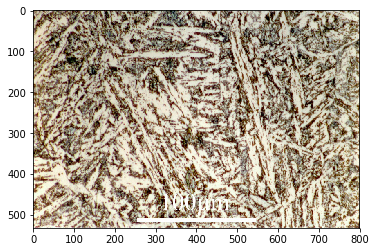

In [82]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('Desktop/21_bainite.jpg')
img2 = img[:,:,::-1]
plt.imshow(img)

In [75]:
#Testing with images
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Desktop/21_bainite.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training.class_indices
if result[0][0] == 1:
    prediction = 'Martensite or Banite'
elif result[0][1] == 1:
    prediction = 'Pearlite'
elif result [0][2] == 1:
    prediction = 'Similar'
else:
    prediction = 'Spherodized Cementite'
prediction
#result

'Martensite or Banite'

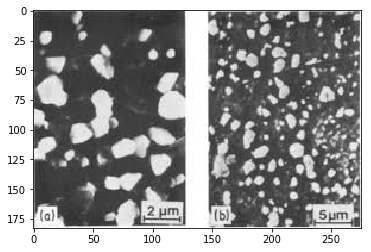

In [81]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('Desktop/download.jpg')
img2 = img[:,:,::-1]
plt.imshow(img)

In [76]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Desktop/download.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training.class_indices
if result[0][0] == 1:
    prediction = 'Martensite or Banite'
elif result[0][1] == 1:
    prediction = 'Pearlite'
elif result [0][2] == 1:
    prediction = 'Similar'
else:
    prediction = 'Spherodized Cementite'
prediction

'Spherodized Cementite'

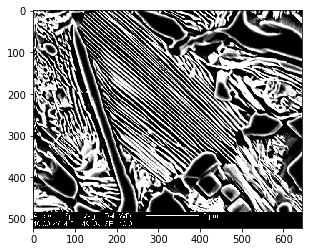

In [80]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread('Desktop/micrograph676.tif')
img2 = img[:,:,::-1]
plt.imshow(img)

In [78]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Desktop/micrograph676.tif', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training.class_indices
if result[0][0] == 1:
    prediction = 'Martensite or Banite'
elif result[0][1] == 1:
    prediction = 'Pearlite'
elif result [0][2] == 1:
    prediction = 'Similar'
else:
    prediction = 'Spherodized Cementite'
prediction

'Pearlite'

In [83]:
from keras.models import model_from_json
import numpy
import os

In [84]:
# serialize model to JSON
classifier_json = classifier.to_json()
with open("classifier_1.json", "w") as json_file:
    json_file.write(classifier_json)

In [85]:
# serialize weights to HDF5
classifier.save_weights("classfier_1.h5")
print("Saved model to disk")

Saved model to disk
